<a href="https://colab.research.google.com/github/whiteydoublee/Colab/blob/main/Ch2.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/9_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
"""
날짜: 2021/10/20
이름: 김예은
내용: 결정트리 실습하기
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
import pydotplus
from sklearn.model_selection import train_test_split

In [5]:
#데이터불러오기
df_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/iris.csv')
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
#학습데이터
iris_train_data = df_iris.iloc[:, 0:4]
iris_train_label = df_iris.iloc[:, 4]
iris_train_label

train_data, test_data, train_label, test_label = train_test_split(iris_train_data, iris_train_label)

In [8]:
#학습하기
model = tree.DecisionTreeClassifier()
model.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
#테스트하기
result = model.predict(test_data)
result

array(['Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Virginica', 'Virginica', 'Setosa'], dtype=object)

In [13]:
#성능평가
score = metrics.accuracy_score(result, test_label)
score

0.9473684210526315

In [16]:
# 모델 설명 확인
model_text = tree.export_text(model)
print(model_text)

|--- feature_3 <= 0.80
|   |--- class: Setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: Versicolor
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- feature_0 <= 5.80
|   |   |   |   |   |--- class: Virginica
|   |   |   |   |--- feature_0 >  5.80
|   |   |   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_0 <= 6.15
|   |   |   |   |--- class: Versicolor
|   |   |   |--- feature_0 >  6.15
|   |   |   |   |--- class: Virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Virginica



[Text(167.4, 298.98, 'petal.width <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [38, 34, 40]\nclass = Vircicolor'),
 Text(141.64615384615385, 244.62, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = Setosa'),
 Text(193.15384615384616, 244.62, 'petal.width <= 1.75\ngini = 0.497\nsamples = 74\nvalue = [0, 34, 40]\nclass = Vircicolor'),
 Text(103.01538461538462, 190.26000000000002, 'petal.length <= 5.05\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Virginica'),
 Text(51.50769230769231, 135.9, 'petal.width <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = Virginica'),
 Text(25.753846153846155, 81.53999999999999, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = Virginica'),
 Text(77.26153846153846, 81.53999999999999, 'speal.length <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Virginica'),
 Text(51.50769230769231, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Vircicolor'),
 Text(103.01538461538462, 27.18000000000000

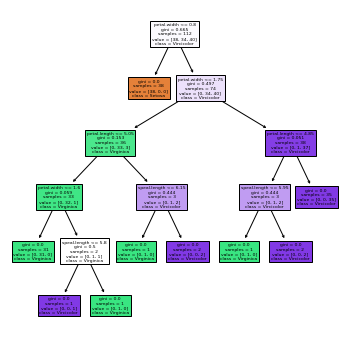

In [18]:
#모델 시각화
fig = plt.figure(figsize=(6,6))
tree.plot_tree(model, feature_names=['speal.length','sepal.width','petal.length','petal.width'], 
               class_names=['Setosa','Virginica','Vircicolor'],
               filled=True)